In [ ]:
 from google.colab import files
 files.upload()  # Click to select and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xsupex","key":"2d60b5648d69d9e3e659c2116c435f5f"}'}

In [ ]:
 # Install the Kaggle package if not already installed
 !pip install -q kaggle

In [ ]:
#creating a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copying the file in the folder
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the jason to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           6857        152  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           3961         55  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11934        257  0.9411765        
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [ ]:
!kaggle datasets download -d ironwolf404/laptop-price-dataset

Dataset URL: https://www.kaggle.com/datasets/ironwolf404/laptop-price-dataset
License(s): apache-2.0
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 38.1MB/s]


In [ ]:
 # List the files in the current directory to identify the ZIP file
 !ls

kaggle.json  laptop-price-dataset.zip  sample_data


In [ ]:
 # Replace 'titanic.zip' with the actual ZIP filename if different
 !unzip laptop-price-dataset.zip

Archive:  laptop-price-dataset.zip
  inflating: laptop_price - dataset.csv  


In [ ]:
 import pandas as pd
 # Replace 'train.csv' with the actual filename
 df = pd.read_csv('laptop_price - dataset.csv')
 # Display the first few rows of the dataframe
 df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df.shape

(1275, 15)

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Copy all unzipped files to a folder in Google Drive
 !cp -r path_to_unzipped_files /content/drive/MyDrive/Colab Notebooks

cp: target 'Notebooks' is not a directory


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
def kmeans(data, k):

    # Initialize centroids randomly
    centroids = df[np.random.choice(len(data), k, replace=False)]

    while True:
        # Assign data points to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)

        # Update centroids as the mean of their assigned points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [7]:
# Generate sample data
np.random.seed(42)
df = np.random.randn(1275,15)

In [9]:
# Apply K-means clustering
k = 5
labels, centroids = kmeans(df, k)

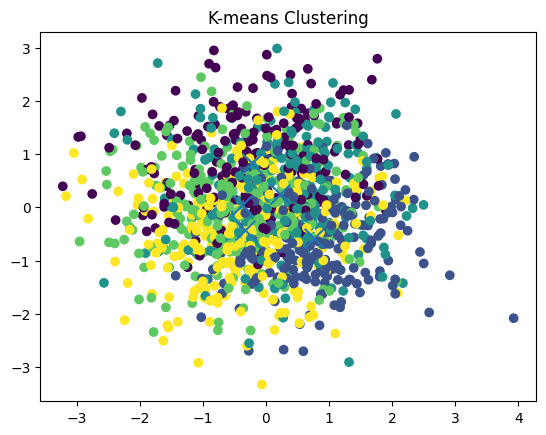

In [12]:
# Visualize the results
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200)
plt.title("K-means Clustering")
plt.show()